In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# df import step => keeping the data in the same git repo as the notebook please pull the complete repo
customer_df = pd.read_csv('Customers.csv')
transaction_df = pd.read_csv('Transactions.csv')
product_df = pd.read_csv('Products.csv')


# Customers Initial Analysis

In [5]:
customer_df.head()
# inference: data in correct format 
# customer ID icrements from 1 
# Signup date is in datetime format => no need to convert

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
customer_df.info()
# inference: no missing values in the data
# total 200 customers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
customer_df.describe()
# inference: all customer ids and names are unique 
# there are only 4 regions in total
# dates are close to unique as there aare a total of 179 unique dates

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [8]:
customer_df['Region'].unique()
# regions: 'South America', 'Asia', 'North America', 'Europe'
# regions are continets, top four continets 

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [9]:
customer_df['SignupDate'].min() , customer_df['SignupDate'].max()
# dates range from 2022-01-22 to 2024-12-18 => yyyy-mm-dd

('2022-01-22', '2024-12-28')

**Initial Inference**: 
1. total customers: 200 all unique not null 
2. total regions: 4 all unique not null 


# Product Initial Analysis 

In [10]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
product_df.info()
# total 100 products, no missing or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
product_df.groupby('Category').count()
# categories: ['Books', 'Electronics', 'Home Decor', 'Clothing']
# there are around same number of each category with home decor having least products

,ProductID,ProductName,Price
Category,,,
Books,26,26,26
Clothing,25,25,25
Electronics,26,26,26
Home Decor,23,23,23


In [13]:
product_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
# even average prices are same for each category 
# although average for home decor is a bit less than others

Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64

In [14]:
pd.DataFrame({
    'Max Price': product_df.groupby('Category')['Price'].max(),
    'Min Price': product_df.groupby('Category')['Price'].min()
}).sort_values('Max Price', ascending=False)
# max price is around similar for each category 
# min price for home decor is a bit high , books is close to it 
# clothing and electronics are close to each other in the regard

,Max Price,Min Price
Category,,
Books,497.76,33.59
Clothing,481.78,18.82
Electronics,459.86,16.08
Home Decor,454.53,41.18


**Inference**:
1. total products: 100 all unique not null 
2. total categories: 4 all unique not null 
3. average values for each category is similar with special eyes on home decor


# Transaction Initial Analysis 

In [15]:
transaction_df.head()
# inference: we have a customer id field 
# this can be used to join with customer df 
# this will allow us more insights into the customer 
# it also has a product id field => it is a many to many join table 
# quatity , totalValue and price fields are further useful for profit analysis 
# totalvalue = price * quantity 


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
transaction_df.info()
# inference: no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [17]:
transaction_df.describe()
# totalvalue: 16.080000 - 1991.040000 => totalvalue = price * quantity 
# max people buy in the range 300 - 500 priced products altough the difference is not much, avg = 300
# quantity: max 4, min 1 => avg 2.53 

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [18]:
transaction_df['TotalValue'].sum()

689995.56

In [19]:
transaction_df['ProductID'].value_counts()
# highest selling product = PO59, P029, and so 

ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
        ..
P024     5
P014     4
P031     4
P044     4
P099     4
Name: count, Length: 100, dtype: int64

In [20]:
# creating a joined df to get more insigts from the combination, merge with customer 
joined_df = pd.merge(transaction_df, customer_df, on='CustomerID', how='left')
# join with product df => many to many join
joined_df = pd.merge(joined_df, product_df, on='ProductID', how='left')

joined_df.head()



,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [21]:
# comparing to check if the prices in both tables are the same
joined_df[joined_df['Price_x'] != joined_df['Price_y']]
# inference: there are no differences in the prices 
# so we can drop one of them 
joined_df = joined_df.drop(columns=['Price_x'])
joined_df.rename(columns={'Price_y': 'Price'}, inplace=True)
joined_df.head()



,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


/var/folders/m2/hn05gr9s56b03slp5rndcllr0000gn/T/ipykernel_9206/2225787013.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', ax=axs[0, 0])
/var/folders/m2/hn05gr9s56b03slp5rndcllr0000gn/T/ipykernel_9206/2225787013.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=joined_df, x='Category', y='Price', palette='viridis', ax=axs[1, 0])
/var/folders/m2/hn05gr9s56b03slp5rndcllr0000gn/T/ipykernel_9206/2225787013.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
/var/fo

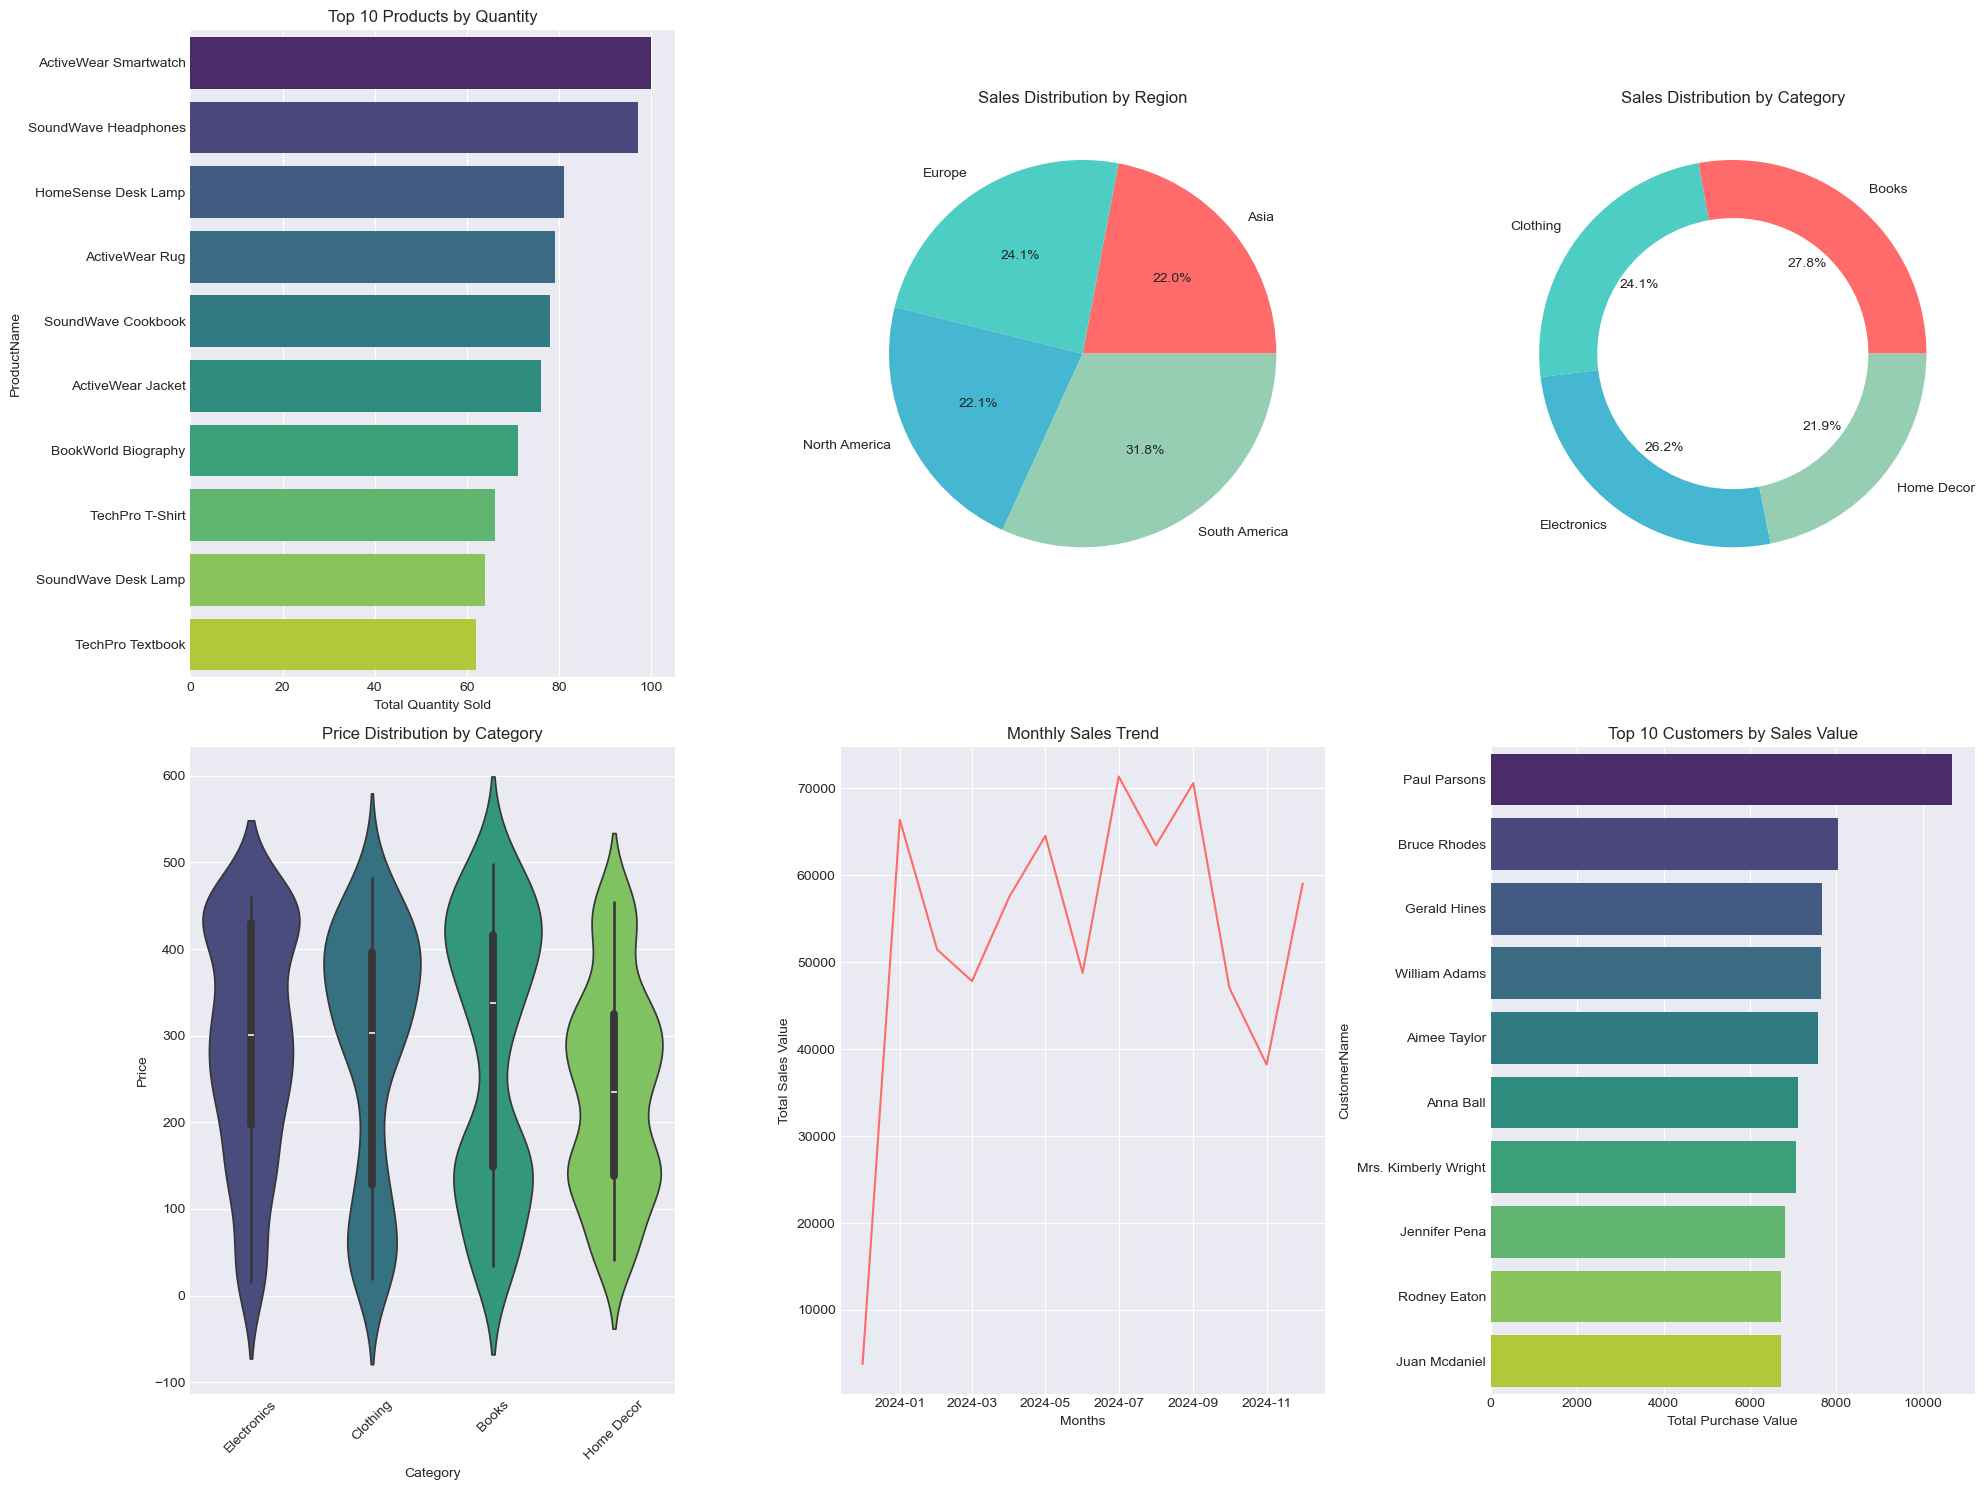

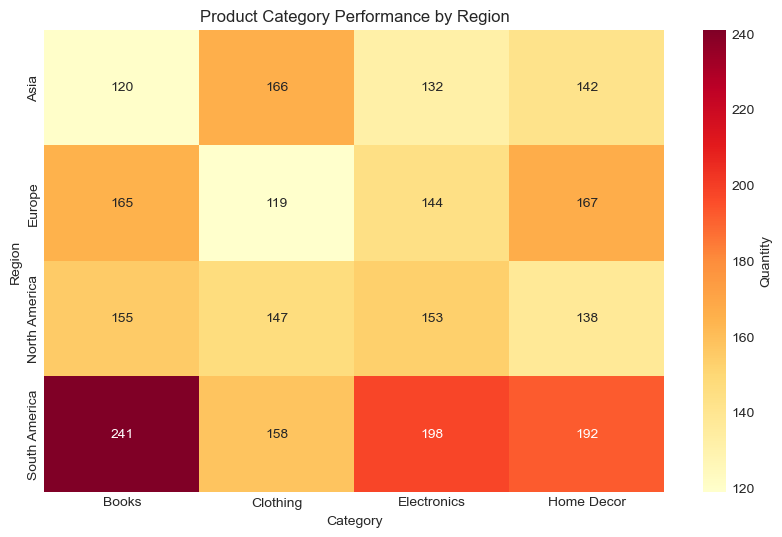

In [22]:
# Set style for Matplotlib
plt.style.use('seaborn-v0_8-darkgrid')  # Updated to the latest supported style
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']

# Create figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 15))  # Simplified subplot creation using `plt.subplots`

# 1. Top 10 Products (Bar Chart)
top_products = joined_df.groupby('ProductName')['Quantity'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Top 10 Products by Quantity')
axs[0, 0].set_xlabel('Total Quantity Sold')

# 2. Sales by Region (Pie Chart)
region_sales = joined_df.groupby('Region')['TotalValue'].sum()
axs[0, 1].pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=colors)
axs[0, 1].set_title('Sales Distribution by Region')

# 3. Sales by Category (Donut Chart)
category_sales = joined_df.groupby('Category')['TotalValue'].sum()
axs[0, 2].pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=colors,
               wedgeprops=dict(width=0.3))  # Adjusted width for a donut chart
axs[0, 2].set_title('Sales Distribution by Category')

# 4. Price Range Distribution (Violin Plot)
sns.violinplot(data=joined_df, x='Category', y='Price', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
axs[1, 0].set_title('Price Distribution by Category')

# 5. Monthly Sales Trend
joined_df['TransactionDate'] = pd.to_datetime(joined_df['TransactionDate'])  # Ensure datetime conversion
monthly_sales = joined_df.groupby(joined_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sns.lineplot(x=monthly_sales.index.to_timestamp(), y=monthly_sales.values, ax=axs[1, 1], color='#FF6B6B')
axs[1, 1].set_title('Monthly Sales Trend')
axs[1, 1].set_xlabel('Months')
axs[1, 1].set_ylabel('Total Sales Value')

# 6. Top Customers (Horizontal Bar Chart)
top_customers = joined_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10)
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis', ax=axs[1, 2])
axs[1, 2].set_title('Top 10 Customers by Sales Value')
axs[1, 2].set_xlabel('Total Purchase Value')

plt.tight_layout()
plt.show()

# Create an interactive heatmap for product performance by region
region_product_pivot = joined_df.pivot_table(
    values='Quantity',
    index='Region',
    columns='Category',
    aggfunc='sum'
)

# what is sold the most in each month. Which category is the best total value. 


plt.figure(figsize=(10, 6))
sns.heatmap(region_product_pivot, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Quantity'})
plt.title('Product Category Performance by Region')
plt.show()


<Figure size 1500x600 with 0 Axes>

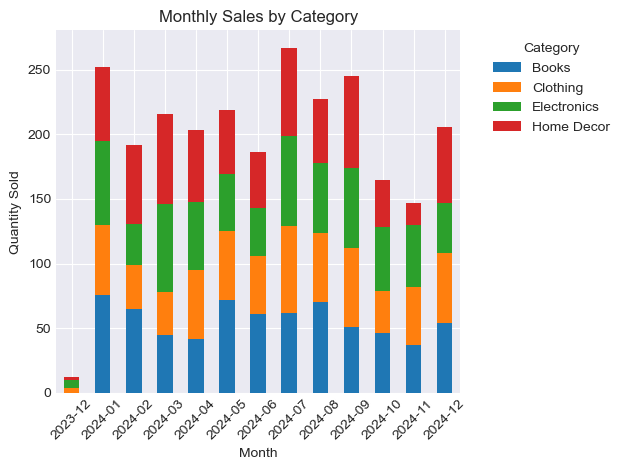

In [23]:
joined_df['Month'] = joined_df['TransactionDate'].dt.to_period('M')
monthly_category_sales = joined_df.pivot_table(
    values='Quantity',
    index='Month',
    columns='Category',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(15, 6))
monthly_category_sales.plot(kind='bar', stacked=True)
plt.title('Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/m2/hn05gr9s56b03slp5rndcllr0000gn/T/ipykernel_9206/4024098934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_total_value.values,


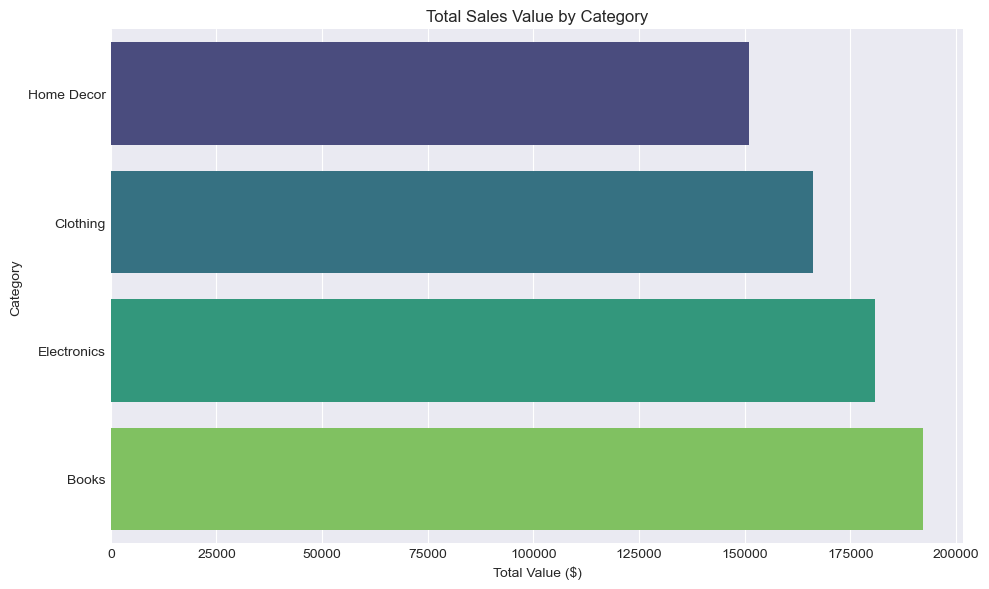

In [24]:
plt.figure(figsize=(10, 6))
category_total_value = joined_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=True)

sns.barplot(x=category_total_value.values, 
           y=category_total_value.index, 
           palette='viridis')
plt.title('Total Sales Value by Category')
plt.xlabel('Total Value ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

/var/folders/m2/hn05gr9s56b03slp5rndcllr0000gn/T/ipykernel_9206/3895802354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='viridis')


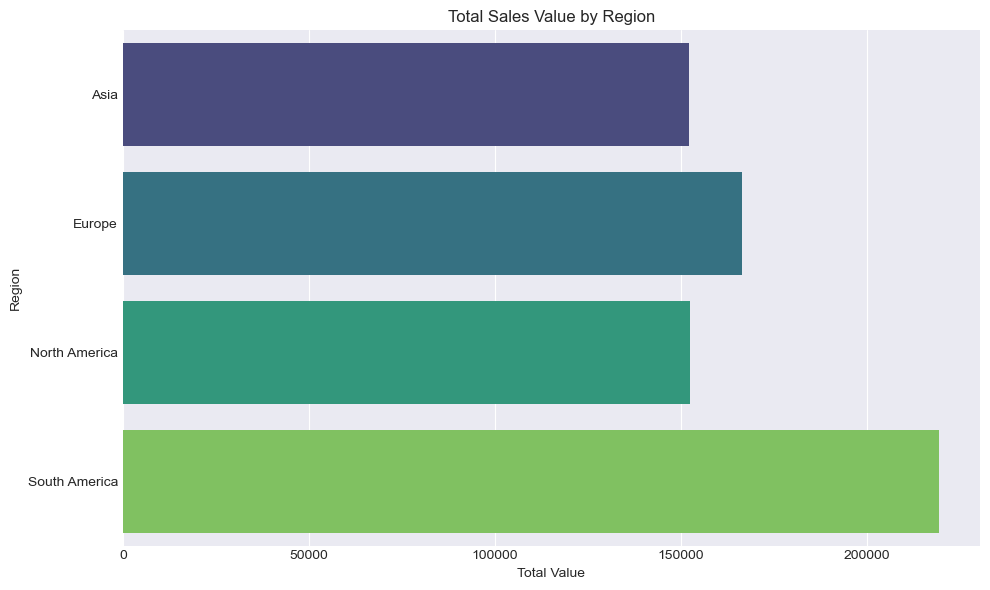

In [25]:
# region wise total sales 
region_sales = joined_df.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='viridis')
plt.title('Total Sales Value by Region')
plt.xlabel('Total Value')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


**Inferences:**

* Strong Performance in Electronics
Smartwatches and headphones are the top-selling products across all regions, reflecting high consumer demand for these categories. This presents an opportunity to double down on improving product quality and competitive pricing to solidify our position as a trusted brand for electronics. Additionally, the fact that customers are purchasing electronics and home décor from our platform suggests successful penetration into the general consumer market. This positions us well to further establish ourselves in the generalized e-commerce space.

* Decline in Textbook Sales: A Shifting Market Trend
Textbooks are the least sold products across all regions. This decline appears to stem not from pricing but from the global shift towards digital books and online learning platforms. Interestingly, textbooks are sold at the highest price points, indicating that our customer base for this category skews toward middle-aged and older demographics. Younger consumers are gravitating toward digital alternatives. While this segment is niche, it can be leveraged by offering premium, specialized textbooks or bundling them with digital versions to appeal to a broader audience.

* South America: A Market on the Brink of Full Potential
South America outperforms other regions in sales across all product categories, making it a crucial growth hub. High demand for books, electronics, and home décor in this region demonstrates our ability to effectively cater to regular customers. With the total sales value also peaking here, further investment in localized marketing, partnerships, and inventory optimization could help solidify our dominance in South America.

* Seasonal Trends in Sales Performance
The months of June through September witness the highest sales, with peak performance in June, August, and January. However, the sales decline from September through December is a concern. Focused marketing campaigns, strategic discounts, and holiday-centric promotions during this period can help sustain momentum. Additionally, clothing shows strong performance in these months, offering an opportunity to push premium apparel collections. For home décor, an improved product range and targeted promotions could help position us as a leader in this category.

* Asia: Premium Clothing and Spending Patterns
Asia leads in clothing sales, with high demand for our premium apparel. This indicates a strong opportunity to position ourselves as a premium clothing brand in the region. On the other hand, lower-range home décor products are performing better, suggesting that customers in Asia prioritize higher spending on clothing while seeking value in home décor. This insight highlights the potential to upsell clothing while tailoring marketing strategies for budget-conscious home décor buyers.

